In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNISTデータの可視化

# keras.datasetsを用いてMNISTデータをダウンロードする
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 2次元データにする
train_x = train_x.reshape(train_x.shape[0], -1)

# 上位1000件に縮小させる
train_x = pd.DataFrame(train_x[:1000, :])
train_y = train_y[:1000]

Using TensorFlow backend.


In [3]:
train_x.shape

(1000, 784)

## MNISTの可視化
- 次元圧縮を行い平面へ射影することで、各レコードの特徴や分布を可視化することができる。

## PCA

In [4]:
from sklearn.decomposition import PCA

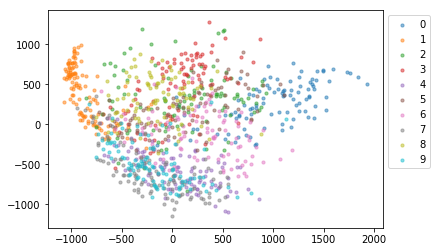

In [5]:
pca = PCA()
x_pca = pca.fit_transform(train_x)

f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

⇒ そこまで綺麗に分かれているわけではなさそうである

## LDA（Linear Discriminant Analysis）

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

/home/sato/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


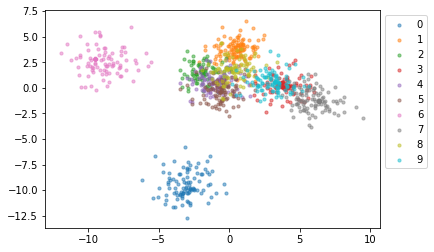

In [7]:
lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

⇒ PCAよりは綺麗に分かれたが、教師ありで分類しているためやや有利に分けることができている。

## t-SNE

In [8]:
from sklearn.manifold import TSNE

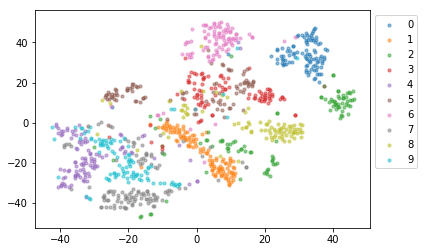

In [9]:
tsne = TSNE(n_components=2, random_state=0)
x_tsne = tsne.fit_transform(train_x)

f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

⇒ 教師なしでありながら、PCAよりもLDAよりも特徴的に分割できている。

## UMAP

In [10]:
from umap import UMAP

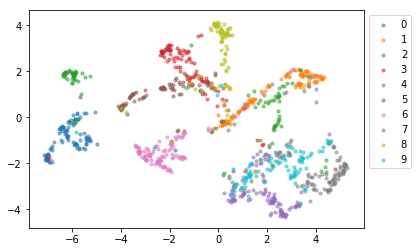

In [11]:
umap = UMAP(random_state=0)
x_umap = umap.fit_transform(train_x)

f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

⇒ t-SNEと同じように綺麗に分けることができた。